In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
meas = Base.classes.measurement
stat = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [96]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
meas_data = session.query(meas.date).order_by(meas.date.desc())
last_date = meas_data.first()
print(f'Last date in DB: {last_date}' )
# Calculate the date 1 year ago from the last data point in the database
last_point_minus_1yr = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(f'1 year before the last date: {last_point_minus_1yr}' )
# Perform a query to retrieve the data and precipitation scores
sel = [meas.date,
       meas.prcp]
year_data = session.query(*sel).\
    filter(meas.date > last_point_minus_1yr).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(year_data)
results_df.head()


Last date in DB: ('2017-08-23',)
1 year before the last date: 2016-08-23


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


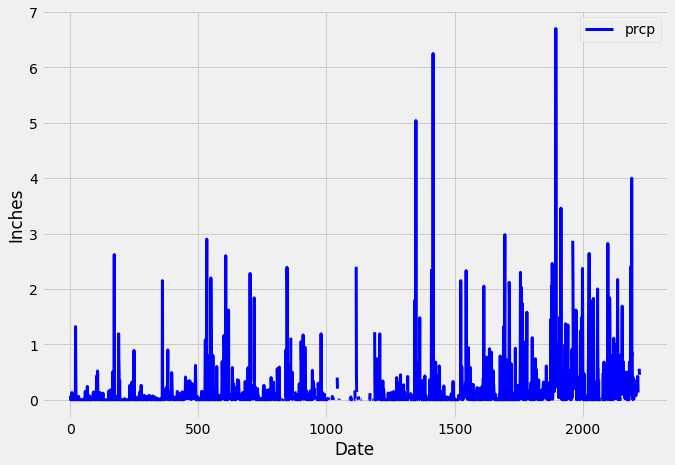

In [64]:
# Sort the dataframe by date
results_df.sort_values(by=['date'])
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(linewidth = 3, color = 'blue',figsize=(10, 7))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [76]:
# Design a query to show how many stations are available in this dataset?
loc_count = session.query(meas.station).\
                group_by(meas.station).count()
print(f'Total number of measurement stations: {loc_count}')

Total number of measurement stations: 9


In [94]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
list_stations_entries = session.query(meas.station, func.count(meas.station)).\
            group_by(meas.station).\
            order_by(func.count(meas.station).desc()).all()


for station in list_stations_entries:
    (stat, count) = station
    print(f'Station: {stat}')
    print(f"   Number of measurements: '{count}'")
    print(f'')

Station: USC00519281
   Number of measurements: '2772'

Station: USC00519397
   Number of measurements: '2724'

Station: USC00513117
   Number of measurements: '2709'

Station: USC00519523
   Number of measurements: '2669'

Station: USC00516128
   Number of measurements: '2612'

Station: USC00514830
   Number of measurements: '2202'

Station: USC00511918
   Number of measurements: '1979'

Station: USC00517948
   Number of measurements: '1372'

Station: USC00518838
   Number of measurements: '511'



In [95]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = 'USC00519281'
meas_min = func.min(meas.tobs)
meas_max = func.max(meas.tobs)
meas_avg = func.avg(meas.tobs)

sel = [meas_min, meas_max, meas_avg]

temps = session.query(*sel).\
    filter(meas.station == most_active).all()

for temp in temps:
    (temp1, temp2, temp3) = temp
print(f'Most Active Weather Station:')
print(f'Min Temp: {temp1}')
print(f'Max Temp: {temp2}')
print(f'Avg Temp: {temp3}')

Most Active Weather Station:
Min Temp: 54.0
Max Temp: 85.0
Avg Temp: 71.66378066378067


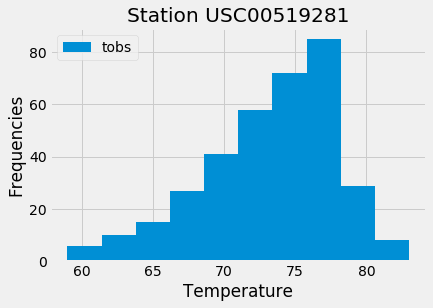

In [110]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
daily_temps = session.query(meas.tobs).\
    filter(meas.date > last_point_minus_1yr).\
    filter(meas.station == most_active).all()

dt_df = pd.DataFrame(daily_temps)

dt_df.plot.hist(bins = 10)
plt.title("Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequencies")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
